Name(s): Viren Velacheri, Cameron Courtney

In [85]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd gdrive/MyDrive/Data\ Mining\ Assignments/HW5-1
# %pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/MyDrive/Data Mining Assignments/HW5-1'
/content/gdrive/MyDrive/Data Mining Assignments/HW5-1


'/content/gdrive/My Drive/Data Mining Assignments/HW5-1'

# Association Analysis

Association analysis uses machine learning algorithms to extract hidden relationships from large datasets. In this assignment we'll be using one of the most commonly used algorithms for association rule mining - the Apriori algorithm.

For the first part of this assignment, the dataset (`large_retail.txt`) that we are going to use has been adapted from the [Retail Market Basket Dataset](http://fimi.ua.ac.be/data/retail.pdf). The dataset contains transaction records supplied by an anonymous Belgian retail supermarket store. Each line in the file represents a separate transaction with the item ids separated by space. The dataset has 3000 transaction records and 99 different item ids.

We also provide a smaller dataset (`small_retail.txt`) with 9 transactions and 5 different item ids along with the solutions. *You should first test your implementation on this dataset, before running it on the larger dataset.*

The assignment will be **autograded**. We will use the `diff` command in linux to compare the output files. So please **check your answers** based on the given sample output files.

**Implementation Hint:**

- Use the `frozenset` data structure in Python (similar to `set` in functionality) to represent the itemsets because `frozenset` is a hashable data structure. You can maintain a dictionary that maps from the itemset (a `frozenset`) to its support count.

For the second part of this assignment, the data we'll use comes from a bakery called "The Bread Basket", located in the historic center of Edinburgh. The dataset contains more than 9000 transactions from the bakery. The file contains the following columns:

- Date. Categorical variable that tells us the date of the transactions (YYYY-MM-DD format). The column includes dates from 2016-10-30 to 2017-04-09.

- Time. Categorical variable that tells us the time of the transactions (HH:MM:SS format).

- Transaction. Quantitative variable that allows us to differentiate the transactions. The rows that share the same value in this field belong to the same transaction.

- Item. Categorical variable with the products purchased.

## Part 1 - Apriori Algorithm from scratch

Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. In this part, you'll be implementing this algorithm for generating the itemsets that occur enough times to meet the `min_sup` threshold. Based on these frequent itemsets you'll find association rules that have confidence meeting or exceeding the `min_conf` threshold.

In [86]:
# Standard imports (you can add additional headers if you wish)
import numpy as np

In [87]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()
        data = [[int(x) for x in line.rstrip().split()] for line in content]
    return data

In [88]:
small_dataset = load_dataset('small_retail.txt')
small_dataset

[[1, 2, 5],
 [2, 4],
 [2, 3],
 [1, 2, 4],
 [1, 3],
 [2, 3],
 [1, 3],
 [1, 2, 3, 5],
 [1, 2, 3]]

**Q1.** Implement the function `create_1_itemsets` that takes as input the entire dataset and returns a list of all the 1-itemsets. For example, for `small_retail.txt` it should return:
~~~
[frozenset({1}),
 frozenset({2}),
 frozenset({3}),
 frozenset({4}),
 frozenset({5})]
 ~~~
 Please **don't hardcode** the item ids, your code should support item ids that are non-sequential.

In [89]:
def create_1_itemsets(dataset):
    c1 = []
    # your code goes here
    item_set = set()
    num_list = []
    for retail in dataset:
      for item in retail:
        if not item in item_set:
          num_list.append(item)
          item_set.add(item)
    num_list.sort()
    for num in num_list:
      c1.append(frozenset([num]))
    return c1

**Q2.** Implement function `filter_candidates` that takes as input the candidate itemsets, the dataset, and the minumum support count `min_sup`, and filters out candidates that don't meet the support threshold.

**Hint:** You should also return the support count information (perhaps as a `dict`) for the itemsets. This will be useful later on for the final output.

In [90]:
def filter_candidates(candidates, dataset, min_sup):
    retlist = []
    support_data = {}
    # your code goes here
    for candidate in candidates:
      counter = 0
      for data in dataset:
        data_frozenset = frozenset(data)
        intersection = data_frozenset.intersection(candidate)
        check = intersection == candidate
        if check:
          counter += 1
      if counter >= min_sup:
        retlist.append(candidate)
        support_data[candidate] = counter
    return retlist, support_data

**Q3.** Implement the function `generate_next_itemsets` that takes in frequent itemsets of size `k` and generates candidate itemsets of size `k + 1`.

**Hint:** Use either the F(k-1) x F(k-1) or the F(k-1) x F(1) candidate generation method. **Filter the candidate list based on the apriori principle before returning it!**

In [91]:
import itertools

def generate_next_itemsets(freq_sets):
    retlist = []
    # your code goes here
    for i in range(len(freq_sets)):
      for j in range(i + 1, len(freq_sets)):
         temp1 = list(freq_sets[i])[:-1]
         temp2 = list(freq_sets[j])[:-1]
         check = all(item in temp1 for item in temp2)
         if check:
           if list(freq_sets[i])[-1] != list(freq_sets[j])[-1]:
             newlist = freq_sets[i]
             retlist.append(newlist.union([list(freq_sets[j])[-1]]))
    subset_size = len(freq_sets[0])
    for ret_item in retlist:
      subsets = [frozenset(i) for i in itertools.combinations(set(ret_item), subset_size)]
      for subset in subsets:

        if subset not in freq_sets:
          retlist.remove(ret_item)
          break
    return retlist

**Q4.** Implement the function `apriori_freq_temsets` that takes the entire dataset as input and returns all the frequent itemsets that meet `min_sup`.

In [92]:
def apriori_freq_temsets(dataset, minsup):
     # your code goes here
     all_freq_list = []
     final_dictionary = {}
     one_itemsets = create_1_itemsets(dataset)
     retlist, support_data = filter_candidates(one_itemsets, dataset, minsup)
     final_dictionary.update(support_data)
     all_freq_list.extend(retlist)
     generated_list = generate_next_itemsets(retlist)
     while len(generated_list) != 0:
       retlist, support_data = filter_candidates(generated_list, dataset, minsup)
       final_dictionary.update(support_data)
       all_freq_list.extend(retlist)
       generated_list = generate_next_itemsets(retlist)
     return all_freq_list, final_dictionary

**Q5.** Display the frequent item sets in the form of a table along with their `support` (as a fraction: support count over number of transactions) for the `large_retail.txt` dataset with min support count 300.

Sample Table Format (tab separated table)

~~~
Sup     Freq Itemset
0.67	[1]
0.44	[1, 2]
(and so on)
...
...
~~~

`support(itemset) = support_count(itemset) / num_total_transactions`.

The `support` and the itemset should be separated by a tab (`'\t'`).

Note that the `support` should be rounded to the nearest 2 decimal places (use `round(sup, 2)`). If a support_fraction only contains 1 decimal place (for example, 0.1), you do not need to add a 0 to the end of it (leaving it as 0.1 is fine).

The itemsets should also be in a sorted order where smaller itemsets should come before larger itemsets and itemsets of the same size should be sorted amongst themselves.

For eg. 
~~~~
[1, 2] should come before [1, 2, 3]
[1, 2, 3] should come before [1, 2, 4]
[1, 2, 3] should come before [1, 4, 5]
[1, 2, 3] should come before [2, 3, 4]
~~~~

Note that **this order is very important** because your output will be checked using the `diff` command. The output also **shouldn't contain any duplicates**. The sample output for the `small_retail.txt` dataset with min support count as 2 is:

~~~~
Sup     Freq Itemset
0.67	[1]
0.78	[2]
0.67	[3]
0.22	[4]
0.22	[5]
0.44	[1, 2]
0.44	[1, 3]
0.22	[1, 5]
0.44	[2, 3]
0.22	[2, 4]
0.22	[2, 5]
0.22	[1, 2, 3]
0.22	[1, 2, 5]
~~~~

**Store** this output for the `large_retail.txt` dataset in the file `large_apriori_itemsets.txt`. The sample output file for the `small_retail.txt` dataset has been provided to you as `small_apriori_itemsets.txt` for your convenience.

In [94]:
# your code goes here
large_dataset = load_dataset('large_retail.txt')
freq_items, support_data = apriori_freq_temsets(large_dataset, 300)
with open('large_apriori_itemsets.txt', 'w') as f:
  f.write("Sup\tFreq Itemset\n")
  for item in freq_items:
      support_count = round(support_data[item] / len(large_dataset), 2)
      sorted = list(item)
      sorted.sort()
      f.write(str(support_count) + "\t" + str(sorted) + "\n")
  f.close()

**Q6.** Find the closed frequent item sets along with their `support`. Store the results for the `large_retail.txt` dataset in the file `large_apriori_closed_itemsets.txt`, in the same format as specified in Q5.

In [95]:
# your code goes here
import copy
freq_items, support_data = apriori_freq_temsets(large_dataset, 300)
closed_items = copy.deepcopy(freq_items)
for i in range(len(freq_items)):
  for j in range(i + 1, len(freq_items)):
    if len(freq_items[j]) > len(freq_items[i]):
      if freq_items[j].issuperset(freq_items[i]) and support_data[freq_items[j]] == support_data[freq_items[i]]:
        closed_items.remove(freq_items[i])
        break

with open('large_apriori_closed_itemsets.txt', 'w') as f:
  f.write("Sup\tFreq Itemset\n")
  for item in closed_items:
      support_count = round(support_data[item] / len(large_dataset), 2)
      sorted = list(item)
      sorted.sort()
      f.write(str(support_count) + "\t" + str(sorted) + "\n")
  f.close()

## Extra Credit (+5 points)

**Q7.** Generate the rules having confidence above `min_conf = 0.5` using the frequent itemsets generated in Q5. Display the rules in the form of a table.

Sample table format (tab separated table)

~~~
Sup     Conf    Rule
0.44	0.67	[1] -> [2]
0.22	1.0	 [5] -> [1, 2]
0.22	1.0	 [2, 5] -> [1]
(and so on)
...
...
~~~

Note that rule confidence should be rounded to the nearest 2 decimal places (use `round(conf, 2)`). This table should also be tab (`'\t'`) separated. The rules should be displayed in the sorted order. If a rule is given as `LHS -> RHS` then the rules for which `len(LHS)` is lesser should appear first. If the `len(LHS)` is equal for two rules then rules for which `len(RHS)` is lesser should appear first. If both `len(LHS)` and `len(RHS)` is equal then the rules should be sorted based on LHS first and then based on RHS.

~~~~
Note:
LHS (Left Hand Side)
RHS (Right Hand Side)
~~~~

For eg.
~~~~
[3] -> [2] should come before [1, 3] -> [4]
[4] -> [2] should come before [2] -> [3, 4]
[1, 3] -> [2] should come before [1, 5] -> [2]
[1, 2] -> [3] should come before [1, 2] -> [5]
~~~~

Note that **this order is very important** because your output will be checked using the `diff` command. The sample output for the `small_retail.txt` dataset with `min_conf = 0.5` is:

~~~~
Sup	 Conf	Rule
0.44	0.67	[1] -> [2]
0.44	0.67	[1] -> [3]
0.44	0.57	[2] -> [1]
0.44	0.57	[2] -> [3]
0.44	0.67	[3] -> [1]
0.44	0.67	[3] -> [2]
0.22	1.0	 [4] -> [2]
0.22	1.0	 [5] -> [1]
0.22	1.0	 [5] -> [2]
0.22	1.0	 [5] -> [1, 2]
0.22	0.5	 [1, 2] -> [3]
0.22	0.5	 [1, 2] -> [5]
0.22	0.5	 [1, 3] -> [2]
0.22	1.0	 [1, 5] -> [2]
0.22	0.5	 [2, 3] -> [1]
0.22	1.0	 [2, 5] -> [1]
~~~~

**Store** this output for the `large_retail.txt` dataset in the file `large_apriori_rules.txt`. The sample output file for the `small_retail.txt` dataset has been provided to you as `small_apriori_rules.txt` for your convenience.

**Hint:** You shouldn't traverse the entire dataset to compute the confidence for a rule since you have already computed the `support_data` for all the frequent itemsets. 

In [96]:
# Gets confidence for respective rule given corresponding itemset and subset
import itertools

# This returns the confidence of an item in the set.
def get_confidence(itemset, subset, support_data):
  keys = support_data.keys()
  if itemset not in keys or subset not in keys:
    return 0
  return support_data[itemset] / support_data[subset]

def get_initial_candidates(freq_items):
  candidates = list()
  for itemset in freq_items:
    length = len(itemset)
    if (length > 1):   
      antecedents = list(itertools.combinations(itemset, length - 1))
      for rule in antecedents:
        x = list(rule)
        y = list(itemset.difference(x))
        new_rule = (x, y)
        if new_rule not in candidates:
          candidates.append(new_rule)
  candidates.sort()
  return candidates

# This filters out all rules that don't meet the given confidence threshold.
def confidence_filter(candidates, min_conf, support_data):
  confident = list()
  for cand in candidates:
    subset = frozenset(cand[0])
    itemset = frozenset(cand[0]).union(frozenset(cand[1]))
    if get_confidence(itemset, subset, support_data) >= min_conf:
      confident.append((cand[0], cand[1]))
      
  confident.sort()
  return confident

# This generates new candidates from the previous set of candidates.
def gen_candidates(candidates):
  new_candidates = list()
  for i in range(0, len(candidates)):
    for j in range (i + 1, len(candidates)):
      cand_one_x = frozenset(candidates[i][0])
      cand_two_x = frozenset(candidates[j][0])
      cand_one_y = frozenset(candidates[i][1])
      cand_two_y = frozenset(candidates[j][1])

      new_x = list(cand_one_x.intersection(cand_two_x))
      new_y = list(cand_one_y.union(cand_two_y))


      if len(new_y) > max(len(cand_one_y), len(cand_two_y)) and len(new_x) >= max(len(cand_one_x), len(cand_two_x)):
        new_rule = (new_x, new_y)
        if new_rule not in new_candidates:
          new_candidates.append(new_rule)
  new_candidates.sort()
  return new_candidates

large_dataset = load_dataset('large_retail.txt')
# CHANGE TO LARGE_RETAIL.TXT WITH SUPPORT COUNT OF 300................
freq_items, support_data = apriori_freq_temsets(large_dataset, 300)
rules = []
candidates = get_initial_candidates(freq_items)
while (len(candidates) != 0):
  conf_cand = confidence_filter(candidates, 0.5, support_data)
  rules.extend(conf_cand)
  candidates = gen_candidates(conf_cand)

for rule in rules:
  rule[0].sort()
  rule[1].sort()
rules.sort(key = lambda x: len(x[0]))
with open('large_apriori_rules.txt', 'w') as f:
  f.write("Sup\tConf\tRule\n")
  for x, y in rules:
    union = frozenset(x).union(frozenset(y))
    support_count = round(support_data[union] / len(large_dataset), 2)
    conf = round(get_confidence(union, frozenset(x), support_data), 2)
    f.write(str(support_count) + "\t" + str(conf) + "\t" + str(x) + " -> " + str(y) + "\n")
  f.close()



## Part 2 - Apriori Algorithm using MLXtend

## Installation
`scikit-learn` does not provide any functionality for association rule mining so for this assignment you will be using the `MLxtend` library. The documentation for this library is available [here](http://rasbt.github.io/mlxtend/).

You will need to install the `MLxtend` library. There are several ways of doing this; you can follow the instructions below, or see the setup guide  [here](http://rasbt.github.io/mlxtend/installation/).


### Conda

Most of you should use Conda to do the install. If you downladed Anaconda in order to get Jupyter Notebooks (which is the most common way to get Jupyter Notebooks), then you will want to install `MLxtend` using Conda. 

Open a command prompt / terminal window and type:

`conda install mlxtend --channel conda-forge`

### PyPi

You can also install via pip. Note: If you are running Jupyter notebooks through an Anaconda install, then pip may not place the `MLxtend` libraries in the correct place for use in Jupyter. 

Open a command prompt / terminal window and type:

`pip3 install mlxtend`


In this part, you'll be running this algorithm for generating the itemsets that occur more than the `min_sup` threshold. Based on these frequent itemsets you'll find association rules that have confidence above the `min_conf` threshold.

In [16]:
# Standard imports (you can add additional headers if you wish)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [58]:
%matplotlib inline

In [59]:
# Reading the dataset from file
def load_dataset(file_name):
    with open(file_name, 'r') as f:
        content = f.readlines()[1:]
    transactions = []
    prev_tid = -1
    for t in content:
        t = t.strip().split(',')[-2:]
        tid = t[0]
        item = t[1]
        if prev_tid != tid:
            prev_tid = tid
            transactions.append([item])
        else:
            transactions[-1].append(item)
    return transactions

In [60]:
dataset = load_dataset('BreadBasket_DMS.csv')

# ** NOTE: dataset is a 2D list (not a dataframe!) **

print("Num transactions:", len(dataset))
#Print the first 10 transactions
dataset[:10]

Num transactions: 9531


[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

**Q8.** Many transactions in the dataset include the item "NONE." First, find and remove all the "NONE" items from the dataset. There are some transactions that only contain "NONE," so removing "NONE" will leave some transactions as empty lists. Remove all the empty lists as well. 

Once you have removed the NONEs, find the top 10 best-selling items in the bakery. Create a bar chart to display the total number of transactions for each of the top 10 selling items. Sort the bar chart by frequency (the top most sold item first, down to the 10th most sold item).

Text(0, 0.5, 'Frequency Counts')

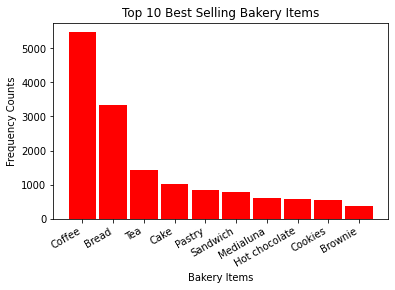

In [67]:
# your code goes here
freq = {}
for transaction in dataset:
  for bakery in transaction:
    if bakery == "NONE":
      transaction.remove("NONE")
    elif bakery in freq:
      freq[str(bakery)] = freq[str(bakery)] + 1
    else:
      freq[str(bakery)] = 1
  if len(transaction) == 0:
    dataset=dataset.remove(transaction)

sort_bakery_items = sorted(freq.items(), key=lambda x: x[1], reverse=True)
item_names = []
item_counts = []
for i in range(10):
  item_names.append(sort_bakery_items[i][0])
  item_counts.append(sort_bakery_items[i][1])

plt.bar(item_names, item_counts,align='center', width = 0.9, color='red')
plt.gcf().autofmt_xdate()
plt.title("Top 10 Best Selling Bakery Items")
plt.xlabel("Bakery Items")
plt.ylabel("Frequency Counts")

**Q9.** 

a.) Using `mlxtend.preprocessing.TransactionEncoder` transform `dataset` into an array format suitable for the `mlxtend` library. You will need to call `fit` then `transform`. 

`TransactionEncoder` learns unique items from the dataset and transforms each transaction into a one-hot encoded boolean numpy array. For example, the resulting encoded dataset will be represented by something like this, where each row is a transaction. If the first transaction contained ['Crepe', 'Jam'], this would correspond to the first row in the encoded table. 

<img src="table.png">

Print the `shape` of the resulting encoded numpy array.

b.) `TransactionEncoder` also has a function `inverse_transform` that allows you to tranform one-hot encoded transactions back to the item labels. Try it out on the first 5 transactions and display the items in the first 5 transactions.

In [68]:
# your code goes here
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
print("Encoded Numpy Array Shape: " + str(te_ary.shape))
first5 = te_ary[:5]
print("Inverse Transformations: " + str(te.inverse_transform(first5)))

Encoded Numpy Array Shape: (9465, 94)
Inverse Transformations: [['Bread'], ['Scandinavian'], ['Cookies', 'Hot chocolate', 'Jam'], ['Muffin'], ['Bread', 'Coffee', 'Pastry']]


**Q10.** Convert the encoded numpy array from Q9 part a into a pandas dataframe. Use the `TransactionEncoder`'s `.columns_` attribute as the column headers. Print the head of the resulting dataframe. 

In [69]:
# your code goes here
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df.head())

   Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  \
0       False                     False      False            False     False   
1       False                     False      False            False     False   
2       False                     False      False            False     False   
3       False                     False      False            False     False   
4       False                     False      False            False     False   

   Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  The BART  The Nomad  \
0  False     False     False         False   False  ...     False      False   
1  False     False     False         False   False  ...     False      False   
2  False     False     False         False   False  ...     False      False   
3  False     False     False         False   False  ...     False      False   
4  False     False     False         False   False  ...     False      False   

   Tiffin  Toast  Truffles  Tshi

**Q11.** Use the `mlxtend.frequent_patterns.apriori` to generate the frequent itemsets with minimum support of 1%. Display these itemsets along with their support values.

In [70]:
# your code goes here
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets

support                 itemsets
0   0.036344              (Alfajores)
1   0.016059               (Baguette)
2   0.327205                  (Bread)
3   0.040042                (Brownie)
4   0.103856                   (Cake)
..       ...                      ...
56  0.023666          (Toast, Coffee)
57  0.014369          (Tea, Sandwich)
58  0.010037    (Coffee, Cake, Bread)
59  0.011199  (Coffee, Bread, Pastry)
60  0.010037      (Tea, Coffee, Cake)

[61 rows x 2 columns]

**Q12.** Use `mlxtend.frequent_patterns.fpmax` to find and display all of the maximal frequent itemsets along with their support values. 

In [24]:
# %pip install mlxtend --upgrade --no-deps

In [71]:
# your code goes here
from mlxtend.frequent_patterns import fpmax
fpmax(df, min_support=0.01, use_colnames=True)

support                  itemsets
0   0.010460                   (Salad)
1   0.010565       (Hearty & Seasonal)
2   0.012995            (Chicken Stew)
3   0.013207          (Jammie Dodgers)
4   0.014157           (Mineral water)
5   0.015003                     (Jam)
6   0.015003                   (Fudge)
7   0.015425                  (Tiffin)
8   0.016059                (Baguette)
9   0.010882  (Spanish Brunch, Coffee)
10  0.019440                    (Coke)
11  0.020285                (Truffles)
12  0.029054            (Scandinavian)
13  0.023666           (Toast, Coffee)
14  0.015848            (Soup, Coffee)
15  0.018067           (Coffee, Scone)
16  0.010354        (Bread, Alfajores)
17  0.019651       (Coffee, Alfajores)
18  0.018806          (Muffin, Coffee)
19  0.020602           (Coffee, Juice)
20  0.039197              (Farm House)
21  0.010777          (Brownie, Bread)
22  0.019651         (Brownie, Coffee)
23  0.014474          (Cookies, Bread)
24  0.028209         (Coffee, Cookies)
25  0.011410     (Cake, Hot chocolate)
26  0.013418    (Bread, Hot chocolate)
27  0.029583   (Coffee, Hot chocolate)
28  0.016904        (Medialuna, Bread)
29  0.035182       (Medialuna, Coffee)
30  0.014369           (Tea, Sandwich)
31  0.017010         (Sandwich, Bread)
32  0.038246        (Sandwich, Coffee)
33  0.011199   (Coffee, Bread, Pastry)
34  0.010037     (Coffee, Cake, Bread)
35  0.010037       (Tea, Coffee, Cake)
36  0.028104              (Tea, Bread)

**Q13.** Using the frequent itemsets and support counts in Q11, find all the closed frequent itemsets along with their support fraction. Also print a count of how many closed frequent itemsets you have found. (MLxtend does not provide a function to do this - you will need to write it yourself.)

In [72]:
# your code goes here
closed_itemsets = frequent_itemsets.copy(deep=True)

for i in range(len(frequent_itemsets)):
  for j in range(i + 1, len(frequent_itemsets)):
    if len(frequent_itemsets['itemsets'][j]) > len(frequent_itemsets['itemsets'][i]):
      if frequent_itemsets['itemsets'][j].issuperset(frequent_itemsets['itemsets'][i]) and frequent_itemsets['support'][j] == frequent_itemsets['support'][i]:
        closed_itemsets.drop([i], inplace=True)
        break

print('Number of Closed Frequent Itemsets: ' + str(len(closed_itemsets)))
closed_itemsets



Number of Closed Frequent Itemsets: 61


support                 itemsets
0   0.036344              (Alfajores)
1   0.016059               (Baguette)
2   0.327205                  (Bread)
3   0.040042                (Brownie)
4   0.103856                   (Cake)
..       ...                      ...
56  0.023666          (Toast, Coffee)
57  0.014369          (Tea, Sandwich)
58  0.010037    (Coffee, Cake, Bread)
59  0.011199  (Coffee, Bread, Pastry)
60  0.010037      (Tea, Coffee, Cake)

[61 rows x 2 columns]

**Q14.** Use `mlxtend.frequent_patterns.association_rules` to calculate rules with a confidence level of 0.25 for the frequent itemsets you generated in Q11.

In [75]:
# your code goes here
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)

antecedents consequents  antecedent support  consequent support  \
0        (Alfajores)     (Bread)            0.036344            0.327205   
1        (Alfajores)    (Coffee)            0.036344            0.478394   
2          (Brownie)     (Bread)            0.040042            0.327205   
3            (Bread)    (Coffee)            0.327205            0.478394   
4          (Cookies)     (Bread)            0.054411            0.327205   
5        (Medialuna)     (Bread)            0.061807            0.327205   
6           (Pastry)     (Bread)            0.086107            0.327205   
7          (Brownie)    (Coffee)            0.040042            0.478394   
8             (Cake)    (Coffee)            0.103856            0.478394   
9          (Cookies)    (Coffee)            0.054411            0.478394   
10   (Hot chocolate)    (Coffee)            0.058320            0.478394   
11           (Juice)    (Coffee)            0.038563            0.478394   
12       (Medialuna)    (Coffee)            0.061807            0.478394   
13          (Muffin)    (Coffee)            0.038457            0.478394   
14          (Pastry)    (Coffee)            0.086107            0.478394   
15        (Sandwich)    (Coffee)            0.071844            0.478394   
16           (Scone)    (Coffee)            0.034548            0.478394   
17            (Soup)    (Coffee)            0.034443            0.478394   
18  (Spanish Brunch)    (Coffee)            0.018172            0.478394   
19             (Tea)    (Coffee)            0.142631            0.478394   
20           (Toast)    (Coffee)            0.033597            0.478394   
21     (Cake, Bread)    (Coffee)            0.023349            0.478394   
22   (Bread, Pastry)    (Coffee)            0.029160            0.478394   
23       (Tea, Cake)    (Coffee)            0.023772            0.478394   

     support  confidence      lift  leverage  conviction  
0   0.010354    0.284884  0.870657 -0.001538    0.940818  
1   0.019651    0.540698  1.130235  0.002264    1.135648  
2   0.010777    0.269129  0.822508 -0.002326    0.920538  
3   0.090016    0.275105  0.575059 -0.066517    0.719561  
4   0.014474    0.266019  0.813004 -0.003329    0.916638  
5   0.016904    0.273504  0.835879 -0.003319    0.926082  
6   0.029160    0.338650  1.034977  0.000985    1.017305  
7   0.019651    0.490765  1.025860  0.000495    1.024293  
8   0.054728    0.526958  1.101515  0.005044    1.102664  
9   0.028209    0.518447  1.083723  0.002179    1.083174  
10  0.029583    0.507246  1.060311  0.001683    1.058553  
11  0.020602    0.534247  1.116750  0.002154    1.119919  
12  0.035182    0.569231  1.189878  0.005614    1.210871  
13  0.018806    0.489011  1.022193  0.000408    1.020777  
14  0.047544    0.552147  1.154168  0.006351    1.164682  
15  0.038246    0.532353  1.112792  0.003877    1.115384  
16  0.018067    0.522936  1.093107  0.001539    1.093366  
17  0.015848    0.460123  0.961807 -0.000629    0.966156  
18  0.010882    0.598837  1.251766  0.002189    1.300235  
19  0.049868    0.349630  0.730840 -0.018366    0.802014  
20  0.023666    0.704403  1.472431  0.007593    1.764582  
21  0.010037    0.429864  0.898557 -0.001133    0.914880  
22  0.011199    0.384058  0.802807 -0.002751    0.846843  
23  0.010037    0.422222  0.882582 -0.001335    0.902779

**Q15.** An important step in generating a set of association rules is to determine the optimal thresholds for support and confidence. If we set these values too low we will get a lot of rules and most of them will not be useful. Generate the frequent itemsets with minimum support of 0.5% and plot the number of rules generated with respect to the confidence threshold by varying its value between 0 and 1 with increments of 0.1. What happens when we increase the confidence level?

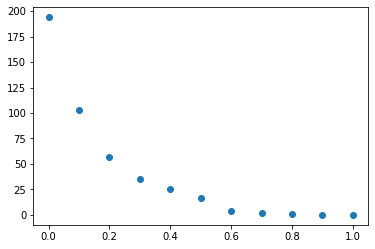

In [98]:
# your code goes here
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
rules_list = []
confidence_thresholds = []
counter = 0
while counter <= 1:
  confidence_thresholds.append(counter)
  rules_list.append(len(association_rules(frequent_itemsets, metric="confidence", min_threshold=counter)))
  counter += 0.1

plt.scatter(confidence_thresholds, rules_list)
# plt.plot(confidence_thresholds, rules_list)
# When we increase the confidence level, it decreases the number of rules.

**Q16.** What value would you choose for the minimum confidence threshold based on the plot in Q15? Why? Display the rules generated for the your chosen value. Take a look at the generated rules. Are they interesting? Why/why not?

In [99]:
# your code goes here
# Based on the elbow method, the value we would choose to the minimum confidence threshold would
# be 0.3. The rules generated for this confidence value are displayed below:

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# The rules are interesting for a number of reasons. One thing that we noticed
# is that nearly every consequent is the itemset Coffee except for two
# which are both Bread itemsets. This means that pretty much every food item is bound
# to be paired with Coffee except the Jam and Pastry itemsets which go with the Bread food itemset.
# Due to this, almost all the consequent support values are the same. 

antecedents consequents  antecedent support  \
0              (Alfajores)    (Coffee)            0.036344   
1                    (Jam)     (Bread)            0.015003   
2                 (Pastry)     (Bread)            0.086107   
3                (Brownie)    (Coffee)            0.040042   
4                   (Cake)    (Coffee)            0.103856   
5           (Chicken Stew)    (Coffee)            0.012995   
6                   (Coke)    (Coffee)            0.019440   
7                (Cookies)    (Coffee)            0.054411   
8      (Hearty & Seasonal)    (Coffee)            0.010565   
9          (Hot chocolate)    (Coffee)            0.058320   
10        (Jammie Dodgers)    (Coffee)            0.013207   
11                 (Juice)    (Coffee)            0.038563   
12      (Keeping It Local)    (Coffee)            0.006656   
13             (Medialuna)    (Coffee)            0.061807   
14         (Mineral water)    (Coffee)            0.014157   
15                (Muffin)    (Coffee)            0.038457   
16                (Pastry)    (Coffee)            0.086107   
17                 (Salad)    (Coffee)            0.010460   
18              (Sandwich)    (Coffee)            0.071844   
19                 (Scone)    (Coffee)            0.034548   
20                  (Soup)    (Coffee)            0.034443   
21        (Spanish Brunch)    (Coffee)            0.018172   
22                   (Tea)    (Coffee)            0.142631   
23                (Tiffin)    (Coffee)            0.015425   
24                 (Toast)    (Coffee)            0.033597   
25              (Truffles)    (Coffee)            0.020285   
26           (Cake, Bread)    (Coffee)            0.023349   
27        (Cookies, Bread)    (Coffee)            0.014474   
28  (Bread, Hot chocolate)    (Coffee)            0.013418   
29      (Medialuna, Bread)    (Coffee)            0.016904   
30         (Bread, Pastry)    (Coffee)            0.029160   
31       (Sandwich, Bread)    (Coffee)            0.017010   
32   (Cake, Hot chocolate)    (Coffee)            0.011410   
33             (Tea, Cake)    (Coffee)            0.023772   
34         (Tea, Sandwich)    (Coffee)            0.014369   

    consequent support   support  confidence      lift  leverage  conviction  
0             0.478394  0.019651    0.540698  1.130235  0.002264    1.135648  
1             0.327205  0.005071    0.338028  1.033076  0.000162    1.016349  
2             0.327205  0.029160    0.338650  1.034977  0.000985    1.017305  
3             0.478394  0.019651    0.490765  1.025860  0.000495    1.024293  
4             0.478394  0.054728    0.526958  1.101515  0.005044    1.102664  
5             0.478394  0.005177    0.398374  0.832732 -0.001040    0.866994  
6             0.478394  0.006445    0.331522  0.692989 -0.002855    0.780289  
7             0.478394  0.028209    0.518447  1.083723  0.002179    1.083174  
8             0.478394  0.005705    0.540000  1.128777  0.000651    1.133926  
9             0.478394  0.029583    0.507246  1.060311  0.001683    1.058553  
10            0.478394  0.006656    0.504000  1.053525  0.000338    1.051625  
11            0.478394  0.020602    0.534247  1.116750  0.002154    1.119919  
12            0.478394  0.005388    0.809524  1.692169  0.002204    2.738431  
13            0.478394  0.035182    0.569231  1.189878  0.005614    1.210871  
14            0.478394  0.005600    0.395522  0.826771 -0.001173    0.862904  
15            0.478394  0.018806    0.489011  1.022193  0.000408    1.020777  
16            0.478394  0.047544    0.552147  1.154168  0.006351    1.164682  
17            0.478394  0.006550    0.626263  1.309094  0.001547    1.395648  
18            0.478394  0.038246    0.532353  1.112792  0.003877    1.115384  
19            0.478394  0.018067    0.522936  1.093107  0.001539    1.093366  
20            0.478394  0.015848    0.460123  0.961807 -0.000629    0.966156  
21            0.478394  0.010882    0.598837